In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
ls controls/

DIES6_ALL_REP1_in_vitro_nucl_array.txt
DIES6_ALL_REP1_naked_plasmid.txt
DIES6_REP2_780READS_in_vitro_nucl_array.txt
DIES6_rep2_780READS_naked_plasmid.txt
in vitro array_disw2_rep2_780READS.csv
in_vitro_nucl_array   (31 .. 2214).fa
in_vitro_nucl_array_(31 .. 2214).fa
naked plasmid_disw2_rep1_780READS.csv
naked plasmid_disw2_rep2_780READS.csv
naked_plasmid.fa
nucl array_disw2_rep1_780READS.csv
wt_mat_Megalodon_repIII_in_vitro_nucl_array.txt
wt_mat_Megalodon_repIII_naked_plasmid.txt


In [9]:
wt_nucarray = np.loadtxt("controls/wt_mat_Megalodon_repIII_in_vitro_nucl_array.txt")
wt_nucarray.shape

(780, 1966)

In [34]:
np.cumsum(wt_nucarray, axis = 1).shape

np.cumsum(wt_nucarray, axis = 0)[779,:]

array([ 0.,  0.,  1., ..., 36.,  0., 67.])

<AxesSubplot:>

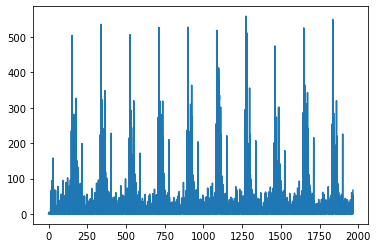

In [39]:
sns.lineplot(x = range(wt_nucarray.shape[1]), y = np.cumsum(wt_nucarray, axis = 0)[779,:])

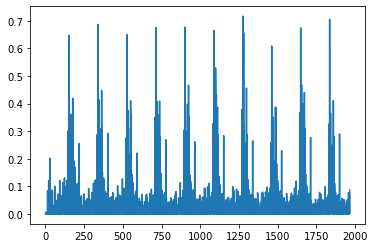

In [87]:
sns.lineplot(x = range(wt_nucarray.shape[1]), y = np.mean(wt_nucarray, axis = 0))
plt.show()

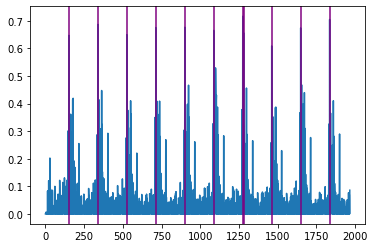

In [90]:
peaks = np.where(np.mean(wt_nucarray, axis = 0) >0.6)

sns.lineplot(x = range(wt_nucarray.shape[1]), y = np.mean(wt_nucarray, axis = 0))
for position in peaks[0]:
    plt.axvline(position, color = "purple")
plt.show()

In [97]:
np.gradient(peaks[0]).mean()

170.0

Text(33.0, 0.5, 'DNA molecule')

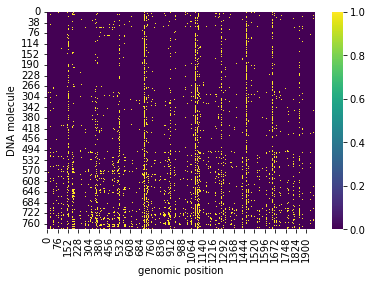

In [98]:
#heatmap
sns.heatmap(wt_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")

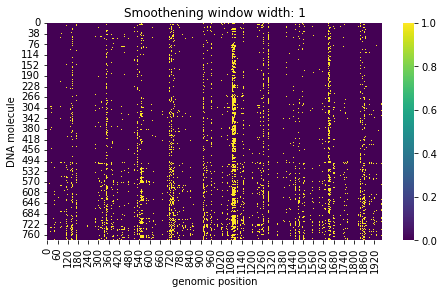

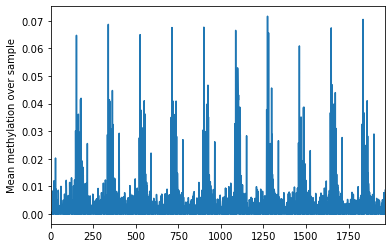

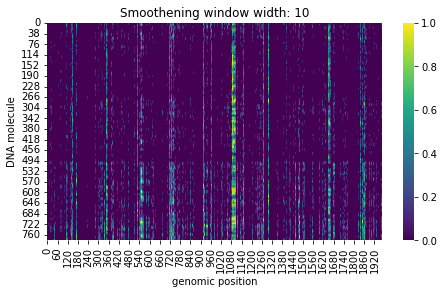

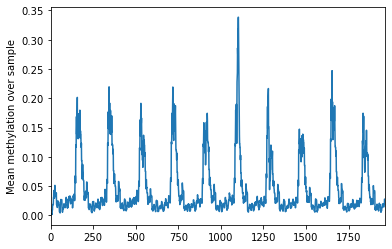

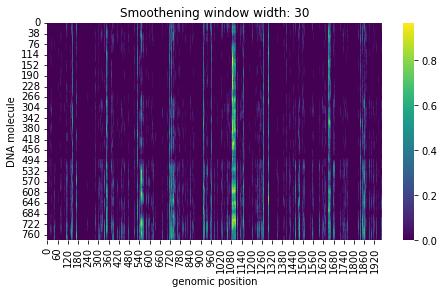

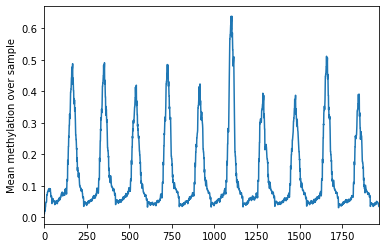

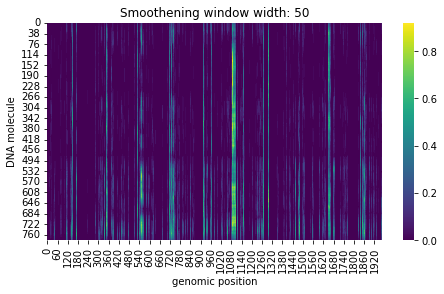

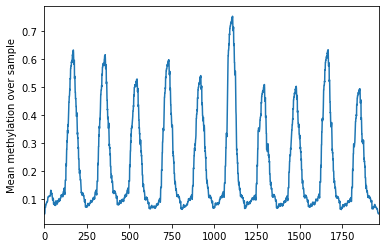

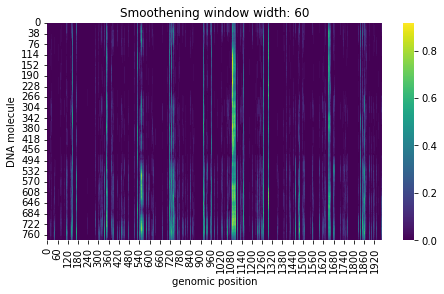

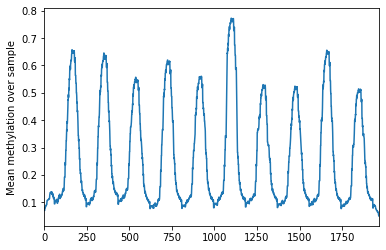

In [202]:
#calculate a sliding mean for each molecule
np.convolve(wt_nucarray[0,:], np.ones(10)/10, mode='same').shape

#N = 20 #smoothening window

#def smooth(array):
 #   return np.convolve(array, np.ones(N)/N, mode = "same")

for N in [1, 10, 30, 50, 60]:
    
    def smooth(array):
        return np.convolve(array, np.ones(N)/N, mode = "same")
    
    wt_nucarray_smooth = np.apply_along_axis(smooth, 0, wt_nucarray)
    
    plt.figure(figsize=(7.5,4))
    sns.heatmap(wt_nucarray_smooth, cmap = "viridis")
    plt.xlabel("genomic position")
    plt.ylabel("DNA molecule")
    plt.xlim(0, 1966)
    plt.title("Smoothening window width: " + str(N))
    plt.show()

    sns.lineplot(x = range(wt_nucarray_smooth.shape[1]), 
                 y = np.convolve(wt_nucarray_smooth.mean(axis = 0), np.ones(N)/10, mode ="same")
                )
    plt.ylabel("Mean methylation over sample")
    plt.xlim(0, 1966)
    plt.show()

## Read in one wt sample for an origin to set up the annotation of the nucleosome areas

In [334]:
ARS305_wt = np.loadtxt("ARS305/wt_mat_Megalodon_repIII_ARS305_end_LexA.txt")

ARS305_anno = pd.read_csv("ARS305/Features_from ARS305_end_LexA _(31 .. 1124).txt", sep  = "\t", 
                          header = None, index_col = 0)
ARS305_anno.columns = ["position", "length"]
ARS305_anno.index = ARS305_anno.index.astype("string")

ARS305_anno["pos_start"] = ARS305_anno.position.str.split(".").str[0].astype(int) -1
ARS305_anno["pos_stop"] = ARS305_anno.position.str.split(".").str[2].astype(int) -1

In [336]:
ARS305_anno.loc["ARS305", "pos_start"]

542

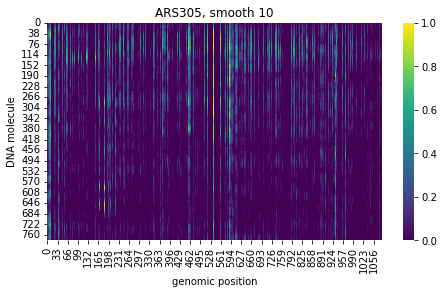

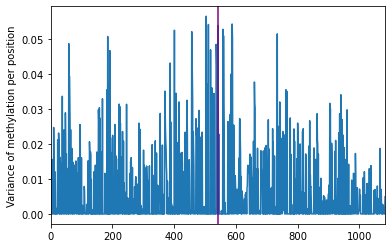

In [268]:
smooth_window = 30

def smooth(array):
        return np.convolve(array, np.ones(smooth_window)/smooth_window, mode = "same")
    
ARS305_wt_smooth = np.apply_along_axis(smooth, 0, ARS305_wt)
    
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt_smooth, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305, smooth 10")
plt.show()

sns.lineplot(x = range(ARS305_wt_smooth.shape[1]), 
                 y = ARS305_wt_smooth.std(axis = 0)**2
                )
plt.ylabel("Variance of methylation per position")
plt.xlim(0, 1084)
plt.axvline(542, color = "purple")
plt.show()

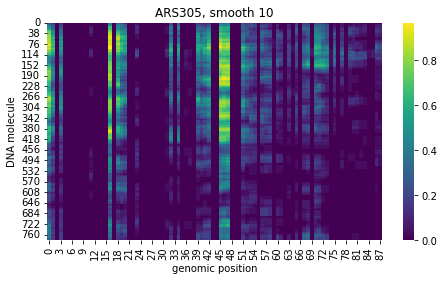

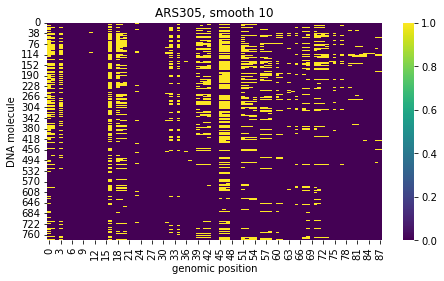

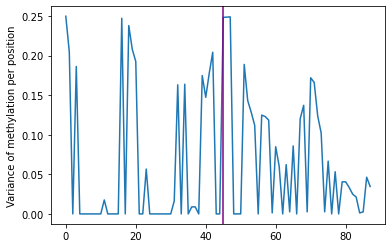

In [364]:
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt_smooth[:, 542:630], cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 630-542)
plt.title("ARS305, smooth 10")
plt.show()

plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt[:, 542:630], cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 630-542)
plt.title("ARS305, smooth 10")
plt.show()

sns.lineplot(x = range(630-542), 
                 y = ARS305_wt[:, 542:630].std(axis = 0)**2
                )
plt.axvline(45, color = "purple")
plt.ylabel("Variance of methylation per position")
plt.show()

#sns.lineplot(x = range(630-542), 
#                 y = ARS305_wt[:, 542:630].cumsum(axis = 0)[779, :]/779
#            )
#plt.axvline(45, color = "purple")
#plt.ylabel("Percent methylated")
#plt.show()

In [358]:
(ARS305_wt[:, 542:630].cumsum(axis = 0)/780).shape

(780, 88)